# SVM & Naive Bayes

####  SVC
> * Linear
> * RBF

#### SVR
> * RBF

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier
import sklearn
from skompiler import skompile
from scipy.stats import shapiro

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [17]:
def snsPlot(df,columnName):
    sns.distplot(df[columnName])
    plt.show()

In [101]:
def shapiroAllData(X):
    
    for i in X:
        stats, p = shapiro(X[i])
        if p > 0.05:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)' + "--> "+i)
        else:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)'+ "--> "+i)

In [181]:
def karsilastirmaMNB(mnb_a,mnb_b):
    print("Multinomial Naive Bayes before tuning: ",mnb_b)
    print("Multinomial Naive Bayes after tuning ",mnb_a)
    
    if(gnb_a > mnb_b):
        print("İyileşme Oranı : ", mnb_a - mnb_b)

In [143]:
def karsilastirmaGNB(gnb_a,gnb_b):
    print("Gaussian Naive Bayes before tuning: ",gnb_b)
    print("Gaussian Naive Bayes after tuning ",gnb_a)
    
    if(gnb_a > gnb_b):
        print("İyileşme Oranı : ", gnb_a - gnb_b)

In [142]:
def karsilastirmaSVM(svm_a,svm_b):
    print("SVM (classification) before tuning: ",svm_b)
    print("SVM (classification): after tuning ",svm_a)
    
    if(svm_a > svm_b):
        print("İyileşme Oranı : ", svm_a - svm_b)

In [56]:
def karsilastirmaRBFSVM(rbfsvm_a,rbfsvm_b):
    print("SVM (classification) before tuning: ",rbfsvm_b)
    print("SVM (classification): after tuning ",rbfsvm_a)
    
    if(rbfsvm_a > rbfsvm_b):
        print("İyileşme Oranı : ", rbfsvm_a - rbfsvm_b)

In [31]:
def karsilastirmaRBFSVR(rbfsvr_a, rbfsvr_b):
    print("RBF-SVR Before Tuning score MSE : ", rbfsvr_b )
    print("RBF-SVR After Tuning score MSE :", rbfsvr_a)

In [ ]:
def karsilastirmaLinearSVR(linearsvr_a, linearsvr_b):
    print("RBF-SVR Before Tuning score MSE : ", linearsvr_b )
    print("RBF-SVR After Tuning score MSE :", linearsvr_a)

In [35]:
def karsilastirmaLinearSVM(lsvm_a,lsvm_b):
    print("LinearSVM (classification) before tuning: ",lsvm_b)
    print("LinearSVM (classification): after tuning ",lsvm_a)
    
    if(lsvm_a > lsvm_b):
        print("İyileşme Oranı : ", lsvm_a - lsvm_b)

In [85]:
def splitToPosNegNotr(data, columnName):
    # pos = 1 , neg = 2, notr= 0

    for index in range(len(df['90_target'])):
        if df['90_target'][index]>0:
            df['90_target'][index]=1  
        
        elif(df['90_target'][index]<0):
            df['90_target'][index]=2
        
        else:
            df['90_target'][index]=0 

In [22]:
def karsilastirmaSVR(svr_a, svr_b):
    print("SVR Before Tuning score MSE : ", svr_b )
    print("SVR After Tuning score MSE :", svr_a)

In [3]:
def importanceFun(x):
    Importance = pd.DataFrame({"Importance": x.feature_importances_*100},
                          index = xtrain.columns)
    Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
    plt.xlabel("Degisken Onem Duzeyleri")
    plt.show()

# SVM

# Classification / SVC

In [5]:
data = pd.read_csv("hmelq.csv")
df = data.copy()
df=df.dropna()

data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


### Model & Tahmin

In [6]:
y=df['bad']
dummy_variable=pd.get_dummies(df[['reason','job']])
X_ = df.drop(['bad','reason','job'],axis=1).astype('float64')
X_.head(0)

X = pd.concat((X_,dummy_variable),axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)

In [8]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [9]:
y_pred = svm_model.predict(X_test)
svmc_b = accuracy_score(y_test, y_pred)
svmc_b

0.9207920792079208

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       554
           1       1.00      0.08      0.14        52

    accuracy                           0.92       606
   macro avg       0.96      0.54      0.55       606
weighted avg       0.93      0.92      0.89       606



### Model Tuning

In [11]:
svm_model

SVC(kernel='linear')

In [13]:
? svm_model

In [12]:
svc_params = {"C": np.arange(1,10), 
              "kernel":["linear", "rbf", "poly"]}
svc = SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 62.5min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [14]:
print("En iyi parametreler "+ str(svc_cv_model.best_params_))

En iyi parametreler {'C': 5, 'kernel': 'linear'}


In [15]:
svc_tuned = SVC(kernel = "linear", C=5).fit(X_train, y_train)

In [18]:
y_pred = svc_tuned.predict(X_test)
svm_a = accuracy_score(y_test, y_pred)
svm_a

0.9207920792079208

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       554
           1       1.00      0.08      0.14        52

    accuracy                           0.92       606
   macro avg       0.96      0.54      0.55       606
weighted avg       0.93      0.92      0.89       606



In [25]:
karsilastirmaSVM(svm_a,svm_b)

SVM (classification) before tuning:  0.9207920792079208
SVM (classification): after tuning  0.9207920792079208


## # LinearSVC

In [28]:
from sklearn.svm import SVC, LinearSVC

In [29]:
svm_model = LinearSVC(class_weight={1:2}, multi_class='crammer_singer').fit(X_train, y_train)

In [42]:
y_pred = svm_model.predict(X_test)

In [43]:
lsvm_b = accuracy_score(y_test, y_pred)
lsvm_b

0.10396039603960396

### Model Tuning LinearSVC

In [37]:
svc_params = {"C": np.arange(1,15)}

svc = LinearSVC()

svc_cv_model = GridSearchCV(svc,svc_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=2)

In [38]:
print("En iyi parametreler : " + str(svc_cv_model.best_params_))

En iyi parametreler : {'C': 6}


In [39]:
svc_tuned = SVC(kernel = "linear", C=6).fit(X_train, y_train)

In [40]:
y_pred = svc_tuned.predict(X_test)
lsvm_a = accuracy_score(y_test, y_pred)
lsvm_a

0.9207920792079208

In [44]:
karsilastirmaLinearSVM(lsvm_a,lsvm_b)

LinearSVM (classification) before tuning:  0.10396039603960396
LinearSVM (classification): after tuning  0.9207920792079208
İyileşme Oranı :  0.8168316831683169


# RBF SVC

In [45]:
svc_model = SVC(kernel="rbf").fit(X_train, y_train)

In [46]:
svm_model

LinearSVC(class_weight={1: 2}, multi_class='crammer_singer')

In [47]:
y_pred = svc_tuned.predict(X_test)
rbfsvc_b = accuracy_score(y_test, y_pred)
rbfsvc_b

0.9207920792079208

### Tuning

In [48]:
svm_model.get_params()

{'C': 1.0,
 'class_weight': {1: 2},
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'crammer_singer',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [54]:
svc_params = { "C": [0.1, 1, 5, 10, 50, 100], 
             "gamma" : [0.001, 0.01, 0.1, 1, 5,10, 50, 100,
                       ] }

In [55]:
svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   16.2s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [57]:
print("En iyi parametreler : " + str(svc_cv_model.best_params_))

En iyi parametreler : {'C': 0.1, 'gamma': 0.001}


In [58]:
svc_tuned = SVC(C=0.1, gamma = 0.001).fit(X_train, y_train)

In [59]:
y_pred = svc_tuned.predict(X_test)
rbfsvc_a = accuracy_score(y_test, y_pred)
rbfsvc_a

0.9141914191419142

In [61]:
karsilastirmaRBFSVM(rbfsvc_a,rbfsvc_b)

SVM (classification) before tuning:  0.9207920792079208
SVM (classification): after tuning  0.9141914191419142


##### Tuning sonrası accurarcy düştü

# SVR

# Regression

In [3]:
from sklearn.svm import SVR, LinearSVR

In [4]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()
df = df.replace('?',np.NaN)
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [6]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [5]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422","ind_109"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

In [6]:
svr_model = SVR("linear").fit(X_train, y_train)

In [11]:
svr_model.predict(X_train)[0:5]

array([-14.51522082,  18.31894646,  29.1266955 , -25.47717725,
       -10.86195542])

In [12]:
print(" y = {0} + {1} x".format(svr_model.intercept_[0],
                               svr_model.coef_[0][0]))

 y = 348.10958520105555 + 1.1403906509681292 x


In [7]:
y_pred = svr_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
svr_b = np.sqrt(mean_squared_error(y_test, y_pred))
svr_b

37.55138851475129

# Model Tuning

In [17]:
svr_model

SVR(kernel='linear')

In [18]:
svr_params = {"C": np.arange(0.1,1,0.1), 
             "kernel":["linear", "rbf", "sigmoid"]}

svr_cv_model = GridSearchCV(svr_model,
                            svr_params,
                          cv=10).fit(X_train, y_train)

In [19]:
print(svr_cv_model.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [20]:
svr_tuned = SVR(C=0.1, kernel="linear").fit(X_train,y_train)
y_pred = svr_tuned.predict(X_test)

In [21]:
svr_a = np.sqrt(mean_squared_error(y_test, y_pred))
svr_a

37.61581796823838

In [23]:
karsilastirmaSVR(svr_a, svr_b)

SVR Before Tuning score MSE :  37.61581796823838
SVR After Tuning score MSE : 37.55138851475129


# RBF SVR

In [24]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()
df = df.replace('?',np.NaN)
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [25]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422","ind_109"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

In [26]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [27]:
y_pred = svr_rbf.predict(X_test)

In [28]:
rbfsvr_b = np.sqrt(mean_squared_error(y_test, y_pred))
rbfsvr_b

45.54672924915332

## Model Tuning

In [29]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [30]:
svr_params = {"C": [0.01, 0.1, 0.4, 5, 10, 20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,
                            svr_params,
                          cv=10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [32]:
svr_tuned = SVR("rbf", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [33]:
y_pred = svr_tuned.predict(X_test)

In [34]:
rbfsvr_a = np.sqrt(mean_squared_error(y_test, y_pred))
rbfsvr_a

36.26184642970133

In [35]:
karsilastirmaRBFSVR(rbfsvr_a, rbfsvr_b)

RBF-SVR Before Tuning score MSE :  36.26184642970133
RBF-SVR After Tuning score MSE : 45.54672924915332


# Linear SVR

In [8]:
svr_linear = SVR("linear").fit(X_train, y_train)

In [9]:
y_pred = svr_linear.predict(X_test)

In [10]:
linearsvr_b = np.sqrt(mean_squared_error(y_test, y_pred))
linearsvr_b

37.55138851475129

### Model Tuning

In [12]:
svr_linear.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svr_params = {"C": [0.01, 5, 10]}
svr_cv_model = GridSearchCV(svr_linear,
                            svr_params,
                          cv=10)

svr_cv_model.fit(X_train, y_train)

In [ ]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
linearsvr_b = np.sqrt(mean_squared_error(y_test, y_pred))
linearsvr_b

In [ ]:
karsilastirmaLinearSVR(linearsvr_a, linearsvr_b)

### Karşılaştırma

In [36]:
karsilastirmaSVR(svr_a, svr_b)
karsilastirmaRBFSVR(rbfsvr_a, rbfsvr_b)
karsilastirmaLinearSVR(linearsvr_a, linearsvr_b)

SVR Before Tuning score MSE :  37.61581796823838
SVR After Tuning score MSE : 37.55138851475129


***

# Naive Bayes 

In [114]:
data = pd.read_excel("HW_Data_Set.xlsx")
df = data.copy()

In [16]:
df.isnull().sum().sort_values(ascending=False)

90_target    0
ind_51       0
ind_62       0
ind_61       0
ind_58       0
            ..
ind_311      0
ind_313      0
ind_315      0
ind_316      0
ind_5        0
Length: 136, dtype: int64

##### Target Visualization

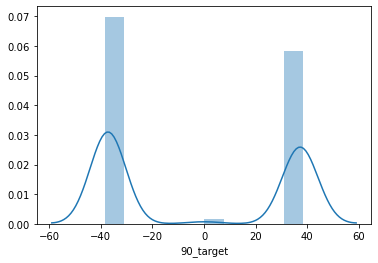

In [18]:
snsPlot(df,"90_target")

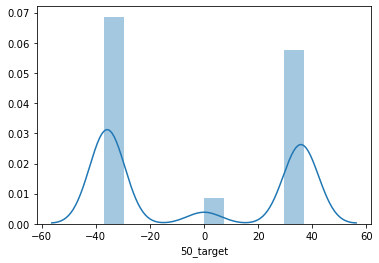

In [19]:
snsPlot(df,"50_target")

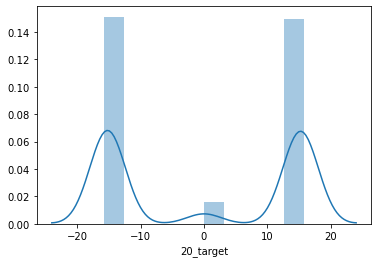

In [20]:
snsPlot(df,"20_target")

### Pozitif / Negatif / Nötr 

##### Target = 90_target

In [93]:
df["90_target"].head(16)

0     1.0
1     1.0
2     2.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
15    0.0
Name: 90_target, dtype: float64

In [89]:
df['90_target'][0] > 0

True

In [79]:
posData=[]
negData=[]
notrData=[]

In [115]:
splitToPosNegNotr(df, '90_target')

In [116]:
df["90_target"].head(16)

0     1.0
1     1.0
2     2.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
15    0.0
Name: 90_target, dtype: float64

In [95]:
df.shape

(6167, 136)

In [117]:
df = df.replace('?',np.NaN)
df = df.dropna()
df.shape

(5126, 136)

In [118]:
y_dt = df['90_target']

In [119]:
X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422",'ind_109'],axis=1)
X_dt.head(0)

df = X_dt.copy()

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

# Gaussian Naive Bayes

In [122]:
shapiroAllData(df)

Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_5
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_6
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_8
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_9
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_10
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_12
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_13
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_14
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_15
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_16
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_17
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_18
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> ind_19
Örneklem Normal (Gaussian) Dağılımdan gelm

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [126]:
nb_model.predict(X_test)[0:10]

array([1., 1., 2., 1., 1., 1., 1., 1., 1., 1.])

In [127]:
nb_model.predict_proba(X_test)[0:10]

array([[1.54811252e-46, 9.99511332e-01, 4.88668440e-04],
       [3.15736537e-28, 9.88451753e-01, 1.15482474e-02],
       [0.00000000e+00, 3.40125666e-01, 6.59874334e-01],
       [1.38791834e-22, 9.99997596e-01, 2.40373874e-06],
       [8.61560857e-44, 1.00000000e+00, 1.15637889e-12],
       [1.33324403e-11, 9.99999988e-01, 1.18843448e-08],
       [0.00000000e+00, 5.35889495e-01, 4.64110505e-01],
       [1.37123493e-01, 8.62867590e-01, 8.91705258e-06],
       [0.00000000e+00, 9.99900037e-01, 9.99627899e-05],
       [5.28292880e-44, 9.99999347e-01, 6.52652701e-07]])

In [128]:
y_pred = nb_model.predict(X_test)

In [129]:
gnb_b = accuracy_score(y_test, y_pred)
gnb_b

0.39011703511053314

In [130]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.36542313895255074

## Model Tuning

In [133]:
nb_params = {"priors": [(0.1, 0.3, 0.6), (0.3, 0.5, 0.2),(0.7, 0.2, 0.1)]}
nb = GaussianNB()

nb_cv= GridSearchCV(nb,nb_params,cv=10)
nb_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [(0.1, 0.3, 0.6), (0.3, 0.5, 0.2),
                                    (0.7, 0.2, 0.1)]})

In [134]:
print("En iyi skor : " + str(nb_cv.best_score_))
print("En iyi parametreler : " + str(nb_cv.best_params_))

En iyi skor : 0.3692900826317673
En iyi parametreler : {'priors': (0.1, 0.3, 0.6)}


In [135]:
nb = GaussianNB(priors= (0.1, 0.3, 0.6))
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=(0.1, 0.3, 0.6))

In [136]:
y_pred = nb_model.predict(X_test)

In [137]:
gnb_a = accuracy_score(y_test, y_pred)
gnb_a

0.3842652795838752

In [138]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.3602198455139632

In [144]:
karsilastirmaGNB(gnb_a,gnb_b)

Gaussian Naive Bayes before tuning:  0.39011703511053314
Gaussian Naive Bayes after tuning  0.3842652795838752


# Multinomial Naive Bayes

In [156]:
data = pd.read_excel("HW_Data_Set.xlsx")
df = data.copy()
df.isnull().sum().sort_values(ascending=False)

90_target    0
ind_51       0
ind_62       0
ind_61       0
ind_58       0
            ..
ind_311      0
ind_313      0
ind_315      0
ind_316      0
ind_5        0
Length: 136, dtype: int64

### Pozitif / Negatif / Nötr 

In [157]:
splitToPosNegNotr(df, '90_target')

In [158]:
df = df.replace('?',np.NaN)
df = df.dropna()

In [159]:
y_dt = df['90_target']

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422",'ind_109'],axis=1)
X_dt.head(0)

df = X_dt.copy()

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

In [165]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train_scaled, y_train)
mnb_model

MultinomialNB()

In [168]:
y_pred = mnb_model.predict(X_test)

In [172]:
mnb_b = accuracy_score(y_test, y_pred)
mnb_b

0.23211963589076723

## Model Tuning

In [174]:
mnb_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [176]:
mnb_params = {"alpha": [1.0, 0.5, 0.01],
             "fit_prior": [True, False]}
mnb = MultinomialNB()

mnb_cv= GridSearchCV(mnb,mnb_params,cv=10)
mnb_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 0.5, 0.01], 'fit_prior': [True, False]})

In [177]:
print("En iyi skor : " + str(mnb_cv.best_score_))
print("En iyi parametreler : " + str(mnb_cv.best_params_))

En iyi skor : 0.5808025085199422
En iyi parametreler : {'alpha': 0.01, 'fit_prior': True}


In [178]:
mnb = MultinomialNB(alpha= 0.01,fit_prior=True)
mnb_model = nb.fit(X_train_scaled, y_train)
mnb_model

GaussianNB(priors=(0.1, 0.3, 0.6))

In [179]:
y_pred = mnb_model.predict(X_test)

In [180]:
mnb_a = accuracy_score(y_test, y_pred)
mnb_a

0.5377113133940182

In [182]:
karsilastirmaMNB(mnb_a,mnb_b)

Multinomial Naive Bayes before tuning:  0.23211963589076723
Multinomial Naive Bayes after tuning  0.5377113133940182
İyileşme Oranı :  0.305591677503251
